# Filter

Digitale Filter sind wichtige Werkzeuge für die Signalverarbeitung bzw. Zeitserienanalyse. Mit Filtern lässt sich Rauschen unterdrücken und das zu untersuchende Signal hervorheben. Desweiteren werden Filter für Interpolation und Vorhersagen verwendet. 

Man unterscheided zwischen Tiefpass-, Hochpass-, Bandpass- und Bandblockfiltern. 

 * **Tiefpassfilter** werden zur Rauschunterdrückung und Glättung eines Signals verwendet. Der Rechen-Prozess entspricht einer Summation bzw. Integration.
 * **Hochpassfilter** verstärken das Rauschen bzw. Änderungen im Signal. Hochpassfilter sind z.B. geeignet um Kanten zu detektieren (2D-Anwendung: Bildverarbeitung). Die Rechenoperation entspricht einer Differenz bzw. Ableitung.
 * **Bandpass bzw. Bandblockfilter** heben bestimmte Frequenzbänder hervor bzw. blockieren sie. Die Konstruktion erfolgt aus einer Kombination von Hoch- und Tiefpassfiltern.


## Literatur


 1. Digitale Signalverarbeitung : Filterung und Spektralanalyse mit MATLAB-Übungen  von Karl-Dirk Kammeyer, Kristian Kroschel http://dx.doi.org/10.1007/978-3-663-09805-8 
 2. https://de.wikipedia.org/wiki/Filter_mit_endlicher_Impulsantwort

## Definition und Eigenschaften der Delta-Funktion

Die Delta-Funktion hat die Eigenschaft

$$\int x(t)\delta(t-t_0)dt=x(t_0)$$

Die Delta-Funktion wird mittels Fourier-Transformation definiert 

$$x(t)=\int e^{\imath 2 \pi f t}df=\delta(t)$$ 

Die Fouriertransformierte der Delta-Funktion ist daher gleich eins 

$$X(f)=\int \delta(t) e^{-\imath 2 \pi f t}dt=1$$

Die Integralgrenzen seien von $-\infty$ bis $\infty$.

# Filter mit endlicher Impulsantwort 

Ein Finite Impule Responsing (FIR) Filter ist ein diskretes, nichtrekursives Filter. 

$$ x(t) \to \fbox{H(f)} \to y(t)$$

Im Ortsraum wird ein Filter durch eine Faltungsmaske $h(\tau)$ beschrieben, welche die Zeitserie $x(t)$ in einer Zeitserie $y(t)$ überführt

$$y(t)=\int h(\tau)x(t-\tau)d\tau$$

Für diskrete Werte ergibt sich

$$y_t=\sum_i h_i x_{t-i}$$

Ein gleitender Mittelwert mit Fensterlänge $l=3$ wird realisiert über die Faltungsmaske

$$ h=[h_{-1},h_{0},h_{1}]=\frac{1}{3}[1,1,1]$$

Der Filter $h(\tau)$ wird auch *Impulsantwort* genannt, weil $h$ die "Antwort" auf das Impuls-Signal $x(t)=\delta(t-\tau)$ ist. 


Im Frequenzraum gilt

$$Y(f)=X(f)\cdot H(f)$$

mit der Übertragungsfunktion

$$H(f)=\int e^{-\imath 2 \pi \tau} h(\tau)d\tau$$

Die Übertragungsfunktion wird auch Transferfunktion genannt.

Kennt man $x(t)$ und $y(t)$ kann die Übertragunsfunktion aus dem Spektrum bestimmt werden

$$H(f)=\frac{Y(f)}{X(f)}$$

## Beispiel Übertragungsfunktion

Wir untersuchen Filter anhand der Übertragung des Signals "Weisses Rauschen". Das Leistungsspektrum des Eingangssignals ist konstant. Die Impulsantwort lässt sich daher direkt im Spektrum erkennen. 

Wir nutzen im Folgenden ein Ensemble-Mittel zum Schätzen des Spektrums. Die Einzelspektren sind sehr verrauscht, daher gibt der Mittelwert aus vielen Spektren eine glattere Kurve. Ensemble-Mittelwert und Standardabweichung können auch zur Abschätzung der Signifikanz von Merkmalen im Spektrum (z.B. Resonanz-Spitzen) genutzt werden.


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


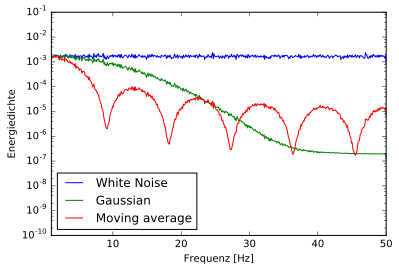

In [29]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

import scipy.signal as sig

N=1024
M=100
X=rand(N*(M+1))


V=11
window = sig.gaussian(V,V/8)
window=window/sum(window)
X_filter1=convolve(X, window, mode='valid')
X_filter2=convolve(X, ones((V,))/V, mode='valid') # Einfacher laufender Mittelwert mittels Faltung

# Test: laufender Mittelwert programmiert als Schleife = identisches Ergebnis wie Faltung
#v=1 
#for i in range(1,N*M-1):
#    X_filter2[i]=1.0/(2*v+1)*(sum(X[i-v:i+v+1]))

Pxx_est=zeros(N/2+1)
Pxx_est_filter1=zeros(N/2+1)
Pxx_est_filter2=zeros(N/2+1)

for i in range(M):
    x=X[i*N:(i+1)*N]
    fs=100 # Sampling Frequenz in Hz
    f, Pxx = sig.periodogram(x, fs)
    Pxx_est+=Pxx
    
    x_filter1=X_filter1[i*N:(i+1)*N]
    f, Pxx = sig.periodogram(x_filter1, fs)
    Pxx_est_filter1+=Pxx
      
    x_filter2=X_filter2[i*N:(i+1)*N]
    f, Pxx = sig.periodogram(x_filter2, fs)
    Pxx_est_filter2+=Pxx
    

    
Pxx_est=Pxx_est/M
Pxx_est_filter1=Pxx_est_filter1/M
Pxx_est_filter2=Pxx_est_filter2/M


figure()
#semilogy(f, Pxx)
semilogy(f, Pxx_est,label='White Noise')
semilogy(f, Pxx_est_filter1,label='Gaussian')
semilogy(f, Pxx_est_filter2,label='Moving average')

legend(loc=3)
ylim([1e-10, 1e-1])
xlim([1, 50])

xlabel('Frequenz [Hz]')
ylabel('Energiedichte')


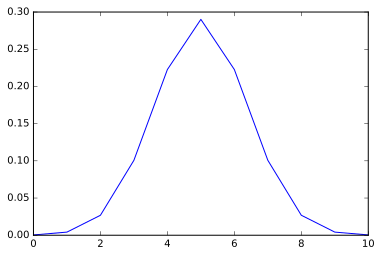

In [30]:
plot(window)

## Diskussion

Die Fouriertransformierte der Rechteckfunktion (genutzt für gleitenden Mittewert) 

$$\mathrm{rect}(t) = \Pi(t) = \begin{cases}
0 & \mbox{if } |t| > \frac{1}{2} \\
\frac{1}{2} & \mbox{if } |t| = \frac{1}{2} \\
1 & \mbox{if } |t| < \frac{1}{2} \\
\end{cases}$$


ist die sinc-Funktion

$$H(f)=sinc(f)=\frac{\sin \pi f}{\pi f}$$

https://de.wikipedia.org/wiki/Sinc-Funktion

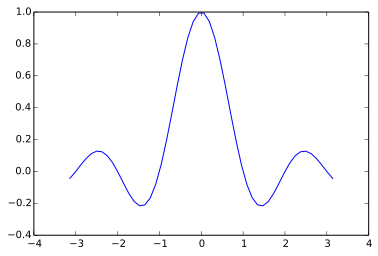

In [2]:
f=linspace(-pi,pi)
plot(f,sin(pi*f)/(pi*f))

Die Nebenmaxima der sinc-Funktion sind deutlich in der Übertragungsfunktion erkennbar. Die Fouriertransformierte der Gauß-Funktion hat wieder die Form einer Gaußfunktion. Daher hat das Gauß-Fenster besondere Glättungseigenschaften.

# Fenster Funktionen

Dokumentationen aus Modul scipy.signal 

References
----------

1. Blackman, R.B. and Tukey, J.W., (1958) The measurement of power spectra, Dover Publications, New York.
2. E.R. Kanasewich, "Time Sequence Analysis in Geophysics", The University of Alberta Press, 1975, pp. 109-110.
3. Wikipedia, "Window function", http://en.wikipedia.org/wiki/Window_function
4. W.H. Press,  B.P. Flannery, S.A. Teukolsky, and W.T. Vetterling, "Numerical Recipes", Cambridge University Press, 1986, page 425.

## Hamming window
The Hamming window is defined as

$$w(n) = 0.54 - 0.46 \cos\left(\frac{2\pi{n}}{M-1}\right)
           \qquad 0 \leq n \leq M-1$$

The Hamming was named for R. W. Hamming, an associate of J. W. Tukey and
is described in Blackman and Tukey. It was recommended for smoothing the
truncated autocovariance function in the time domain.
Most references to the Hamming window come from the signal processing
literature, where it is used as one of many windowing functions for
smoothing values.  It is also known as an apodization (which means
"removing the foot", i.e. smoothing discontinuities at the beginning
and end of the sampled signal) or tapering function.



Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


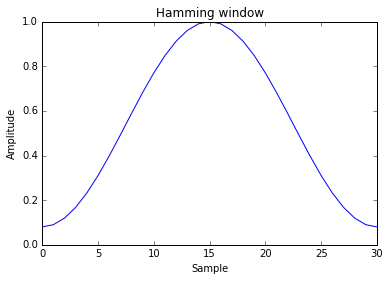

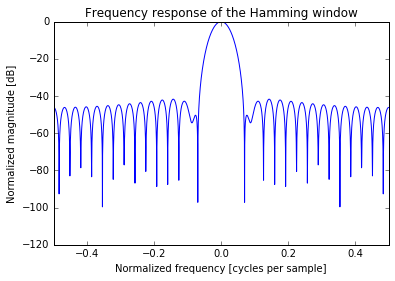

In [12]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

from scipy import signal
from scipy.fftpack import fft, fftshift

def plot_windows_response(window,name):
    figure()
    plot(window)
    title(name+" window")
    ylabel("Amplitude")
    xlabel("Sample")
    figure()
    A = fft(window, 2048) / (len(window)/2.0)
    freq = np.linspace(-0.5, 0.5, len(A))
    response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
    plot(freq, response)
    axis([-0.5, 0.5, -120, 0])
    title("Frequency response of the "+name+" window")
    ylabel("Normalized magnitude [dB]")
    xlabel("Normalized frequency [cycles per sample]")
    
window = signal.hamming(31)
plot_windows_response(window,"Hamming")

# Boxcar

Kein Fenster bzw. Gleichgewichtung aller Werte.

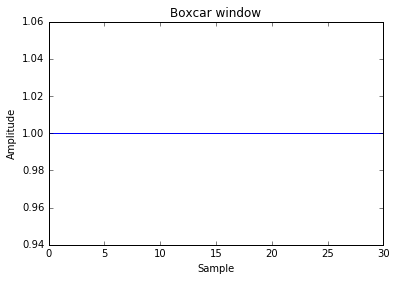

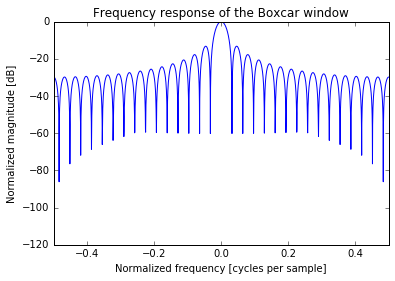

In [13]:
window = signal.boxcar(31)
plot_windows_response(window,"Boxcar")

## Dreieck

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10


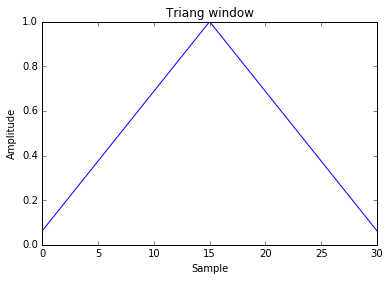

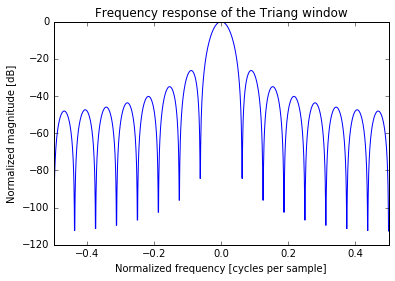

In [50]:
window = signal.triang(31)
plot_windows_response(window,"Triang")

## Hanning

The Hann window is defined as

$$w(n) = 0.5 - 0.5 \cos\left(\frac{2\pi{n}}{M-1}\right)
           \qquad 0 \leq n \leq M-1$$

The window was named for Julius van Hann, an Austrian meterologist. It is
also known as the Cosine Bell. It is sometimes erroneously referred to as
the "Hanning" window, from the use of "hann" as a verb in the original
paper and confusion with the very similar Hamming window.

Most references to the Hann window come from the signal processing
literature, where it is used as one of many windowing functions for
smoothing values.  It is also known as an apodization (which means
"removing the foot", i.e. smoothing discontinuities at the beginning
and end of the sampled signal) or tapering function.

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10


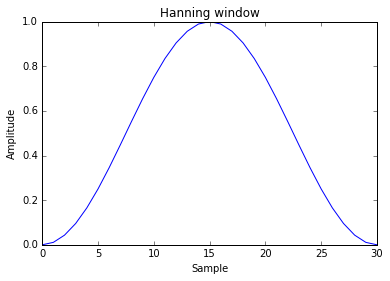

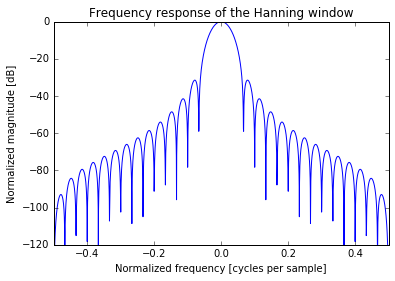

In [21]:
window = signal.hanning(31)
plot_windows_response(window,"Hanning")

## Gauss
The Gaussian window is defined as

$$w(n) = e^{ -\frac{1}{2}\left(\frac{n}{\sigma}\right)^2 }$$



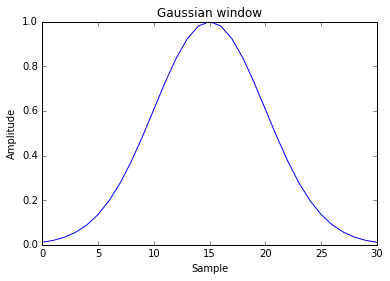

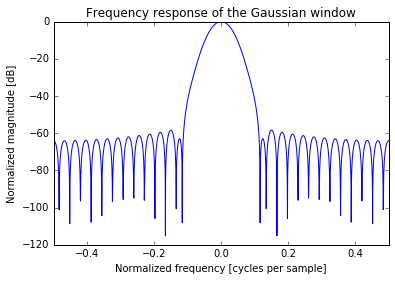

In [25]:
window = signal.gaussian(31,5)
plot_windows_response(window,"Gaussian")

In [ ]:
window = signal.triang(31)
plot_windows_response(window,"Triang")

## Filter Design

Die Koeffizienten für ein einfaches Filter mit endlicher Impulsantwort können mit der Funktion firwin berechnet werden.

https://de.wikipedia.org/wiki/Filter_mit_endlicher_Impulsantwort

### Tiefpass

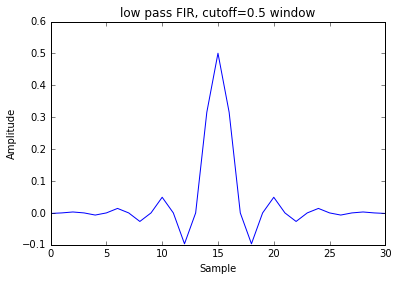

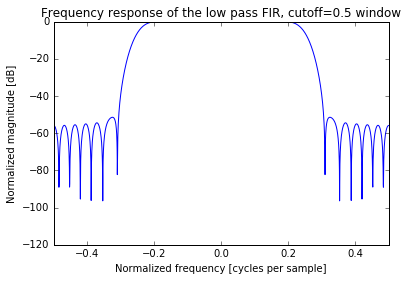

In [55]:
numtaps=31
window=signal.firwin(numtaps,cutoff = 0.5, pass_zero=True)
plot_windows_response(window,"low pass FIR, cutoff=0.5")

### Hochpass

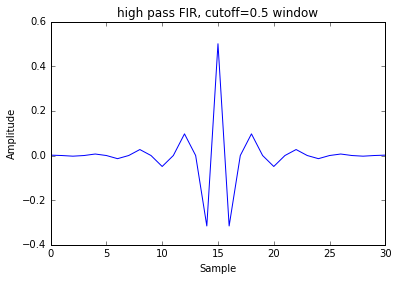

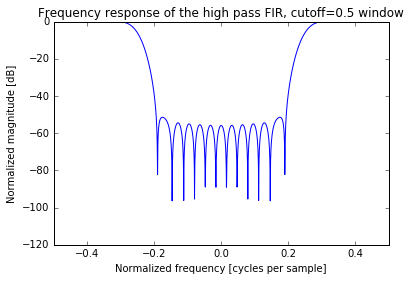

In [63]:
numtaps=31
window=signal.firwin(numtaps,cutoff = 0.5, pass_zero=False)
plot_windows_response(window,"high pass FIR, cutoff=0.5")

### Bandpass

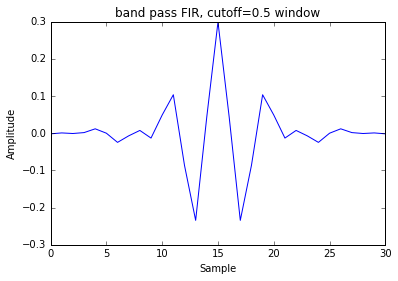

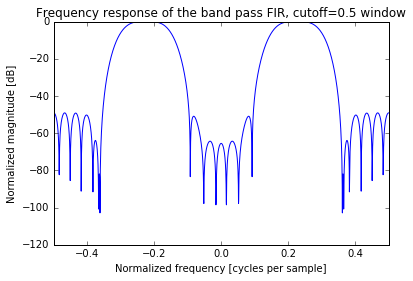

In [64]:
numtaps=31
window=signal.firwin(numtaps,cutoff = [0.3,0.6], pass_zero=False)
plot_windows_response(window,"band pass FIR, cutoff=0.5")

# Spektralanalyse Driftbojendaten
Im Folgenden nutzen wir die Daten einer GPS-Boje, um mittels Spektralanalyse die Periode von Bewegungs-Oszillationen zu bestimmen. 

Hintergrund zu Feldexperiment:
[Kaleschke, L., et al., SMOS sea ice product: Operational application and validation in the Barents Sea marginal ice zone, Remote Sensing of Environment (2015), http://dx.doi.org/10.1016/j.rse.2016.03.009](http://www.seaice.de/Kaleschke_RSE_2016_final.pdf)

In [22]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import scipy.ndimage as ndimage
import scipy.signal as signal
from mpl_toolkits.basemap import Basemap, addcyclic

Populating the interactive namespace from numpy and matplotlib


In [12]:
D=pd.read_csv('CliSAP_Boje_16.csv')
Lon=array(D['Lon'])
Lat=array(D['Lat'])
D.head()

,Date(GMT),Lat,Lon
0,2014-03-15 00:00:00,74.7080,20.8926
1,2014-03-15 00:15:00,74.7050,20.8706
2,2014-03-15 00:30:00,74.7014,20.8508
3,2014-03-15 00:45:00,74.6974,20.8320
4,2014-03-15 01:00:00,74.6928,20.8152


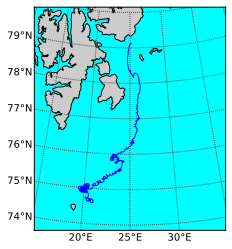

In [49]:
m = Basemap(width=600000,height=700000,resolution='i',projection='laea',lat_ts=80,lat_0=77,lon_0=25.0)
m.drawmapboundary(fill_color='aqua')
m.drawparallels(range(-90,100,1), color='#505050',labels=[1,0,0,0])
m.drawmeridians(range(-180,180,5), color='#505050',labels=[0,0,0,1])
m.drawcoastlines(linewidth=1.0, color='#000000')
m.fillcontinents()
x,y=m(Lon,Lat)
m.plot(x,y)

## Tiefpaßfilter zur Berechnung von Residuuen

Zunächst entfernen wir die langsame Drift mittels eines Glättungs-Filters


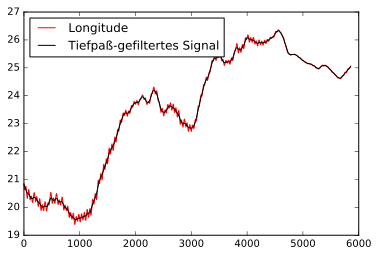

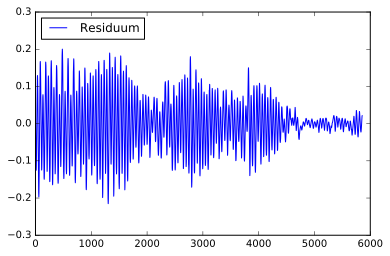

In [82]:
y=Lon

numtaps=2*24*2+1
window=signal.hamming(numtaps)
window=window/sum(window)
y_tiefpass=convolve(y, window, mode='valid') 

edge=int(numtaps/2)
y_residuum=y[edge:-edge]-y_tiefpass
y=y[edge:-edge]
figure()
plot(y,'r-',label='Longitude')
plot(y_tiefpass,'k-',label='Tiefpaß-gefiltertes Signal')
legend(loc=2)
figure()
plot(y_residuum,label='Residuum')
legend(loc=2)

## Frequenzspektrum

Periode max  12.406779661 h


(5, 100)

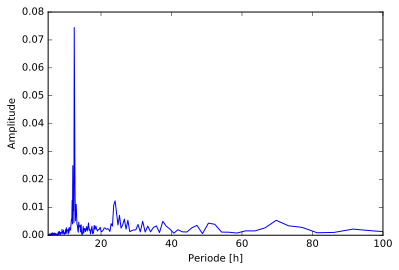

In [83]:
dt=15*60.0 
fa=1/dt # Abtastfrequenz

Y=fft.fft(y_residuum)
N = int(len(Y)/2)+1 # Halbe Länge reicht (gespiegelten Teil ignorieren)

Th=1/(linspace(0, fa/2, N)*60*60) # Umrechnen in Periode, Einheit Stunden
index_max=argmax(Y[:N])
print('Periode max ', Th[index_max],'h')
plot(Th,abs(Y[:N])/N)
xlabel('Periode [h]')
ylabel('Amplitude')
xlim([5,100])

## Gezeiten oder Trägheitsschwingung?

Gezeit M2: 12.421 h

Die Periode der Trägheitsschwingung ist abhängig von geographischer Breite $\phi$ 

$$f=2\Omega \sin(\phi)$$

$$T=\frac{2\pi}{f}$$

Literatur: Pease et al. (1995), Barents Sea tidal and inertial motions from Argos ice buoys during the Coordinated Eastern Arctic Experiment, http://onlinelibrary.wiley.com/doi/10.1029/95JC03014/abstract


In [89]:
phi=deg2rad(77.0)
w=2*pi/86164.09
f=2*w*sin(phi)
T=2*pi/f
print(T/60/60)

12.2820221543


## Frequenzauflösung

Ist die Frequenzauflösung ausreichend, um zwischen Gezeit und Trägheitsschwingung zu unterscheiden?

In [85]:
Th[index_max]

12.40677966101695

In [87]:
Th[index_max+1]

12.302521008403362